In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from data.dataset import ModelNet40, collate_fn
import os

import numpy as np
from utils import *

from model import *

### Getting the dataset path

In [5]:
modelnet40_path = os.path.join(os.getcwd(), os.path.join('data', 'dataset_path.txt'))

with open(modelnet40_path, 'r') as file:
    modelnet40_path = file.readline()

### Initalizing the training set DataLoader object

In [6]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'

In [7]:
train_loader_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Creating the model

In [8]:
in_features = 3
feature_dim = 128
out_features = 1024
k_size = 128
NUM_CLASSES = 40

In [9]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

## Training specifications:

### Optimizer:

In [10]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [11]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

## Overfitting the model

In [12]:
from train import train
epochs = 15
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=[train_loader_256[0]],
          criterion=criterion, epochs=epochs, verbose=False)

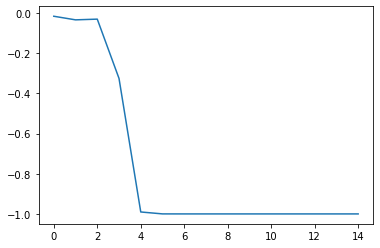

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [14]:
x_test = model(train_loader_256[0][0].float())
(torch.argmax(x_test) == train_loader_256[0][1]).item()

True

In [15]:
x_test

tensor([1.0000e+00, 1.3625e-20, 1.4334e-20, 6.9199e-21, 9.7308e-21, 5.0249e-20,
        3.0796e-20, 9.3231e-21, 1.4511e-20, 6.9172e-21, 7.0388e-21, 1.8742e-20,
        1.4917e-20, 1.1089e-20, 2.3193e-20, 9.4712e-20, 3.4794e-20, 3.4680e-20,
        1.8465e-20, 3.0040e-20, 2.0110e-20, 7.5264e-21, 1.3741e-20, 2.6994e-20,
        1.2460e-20, 6.3016e-21, 1.7985e-20, 2.5916e-20, 7.2058e-20, 1.5876e-20,
        2.0164e-20, 1.5698e-20, 1.1963e-20, 4.3720e-20, 1.0607e-20, 2.5915e-21,
        3.4200e-20, 1.6369e-20, 1.2991e-20, 2.8881e-20],
       grad_fn=<SoftmaxBackward0>)

## Training the model

In [24]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

### DataLoader

In [25]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'

model_net_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [26]:
batch_size = 32

In [27]:
from torch.utils.data import DataLoader

train_loader = DataLoader(model_net_256, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Optimizer:

In [28]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [29]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

In [30]:
epochs = 10
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader_256,
          criterion=criterion, epochs=epochs, save_params=True, verbose=False)

## Model Evaluation:

### Loading the test set:

In [91]:
SAMPLE_SIZE = 256
TEST = True
SAMPLING_METHOD = 'fps'
batch_size = 1

model_net_256_test = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)
test_laoder = DataLoader(model_net_256_test, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [92]:
from eval import evaluate

In [93]:
evaluate(model, model_net_256_test, epochs, verbose=True)

Accuracy: 4.05%	 |	Epoch: 0
Accuracy: 4.05%	 |	Epoch: 1
Accuracy: 4.05%	 |	Epoch: 2
Accuracy: 4.05%	 |	Epoch: 3
Accuracy: 4.05%	 |	Epoch: 4
Accuracy: 4.05%	 |	Epoch: 5
Accuracy: 4.05%	 |	Epoch: 6
Accuracy: 4.05%	 |	Epoch: 7
Accuracy: 4.05%	 |	Epoch: 8
Accuracy: 4.05%	 |	Epoch: 9


[4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392,
 4.051863857374392]

In [95]:
data, label, _ = model_net_256_test[0]

In [100]:
yhat = model(data.float())
print(label)
print((torch.argmax(yhat) == label).item())

tensor(0)
True


In [107]:
accuracy = 0
N = len(model_net_256_test)
model.eval()
for point in model_net_256_test:
    if point == None:
        N -= 1
        continue
    x, y, _ = point
    yhat = model(x.float())
    
    if (torch.argmax(yhat) == y).item():
        accuracy += 1

yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0
yhat= 0 y= 0

In [105]:
acc = accuracy / N

In [106]:
acc

0.042625745950554135